# Mouselab-MDP crash course

In [1]:
%matplotlib inline

Create a new MouselabEnv with a symmetric tree structure and Bernoulli rewards.
Note that the states with unknown values are gray and labeled with their ID.
States with known rewards are green if the reward is positive, else green.
They are labeled with the known reward.

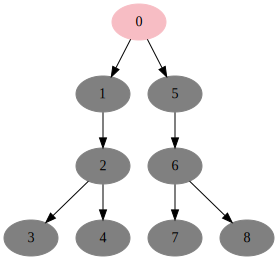

In [2]:
from mouselab import MouselabEnv, RepeatObservationError
from distributions import Categorical
env = MouselabEnv.new_symmetric([2,1,2], Categorical([0,1], [0.25, 0.75]))
env.render()

Observe values (execute computations) with `env.step`. Trying to observe one node twice will throw an error.

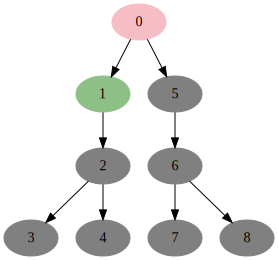

In [3]:
from mouselab import MouselabEnv
from distributions import Categorical
env = MouselabEnv.new_symmetric([2,1,2], Categorical([-1, 1]))
env.step(1)
try:
    env.step(1)
except RepeatObservationError:
    pass
else:
    assert False  # You don't get here.
env.render()

In addition to the stateful interface, there is a functional interface. This is useful for exact
solution methods. Note that `Cat` is a `distributions.Categorical` object, discussed a bit below.

In [4]:
state = env._state
print('Available actions', list(env.actions(state)))
print('Outcomes of action 2:')
for prob, state, reward in env.results(state, 2):
    print('  ', prob, state, reward)

Available actions [2, 3, 4, 5, 6, 7, 8, 9]
Outcomes of action 2:
   0.5 (0, 1, -1, Cat, Cat, Cat, Cat, Cat, Cat) 0
   0.5 (0, 1, 1, Cat, Cat, Cat, Cat, Cat, Cat) 0


A few useful things to know

In [5]:
print('True values of each node:', env.ground_truth)
print('Value of best path given current knowledge:', env.expected_term_reward(env._state))
print('Values of best left and right paths:', env.true_Q(1), 'and', env.true_Q(5))
print('All paths:', env.paths)  # or env.get_paths(0)

True values of each node: [ 0  1  1  1 -1  1 -1 -1 -1]
Value of best path given current knowledge: 1.0
Values of best left and right paths: 3 and -1
All paths: [[1, 2, 3], [1, 2, 4], [5, 6, 7], [5, 6, 8]]


Many methods will return `Distribution` objects. These distributions are always conditional on the
information that has already beeen observed. For example, the `node_value` function is like a
value function, except it considers the distribution of possible outcomes rather than just the expectation.
The maximization in the recursive definition is with respect to the current belief state.